<a href="https://colab.research.google.com/github/abishek151/Coding-/blob/main/Diabetes_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is taken from kaggle which contains data sets for Diabetes originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes based on several medical predictor variables and one target variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. whic will be analysed as follows

# Importing Data

In [ ]:
import gdown
dataset_url = "https://drive.google.com/uc?export=download&id=1L44G7A8uRHvFhDL8O3txBP48yK2WoZbI"
filename = "diabetes"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/uc?export=download&id=1L44G7A8uRHvFhDL8O3txBP48yK2WoZbI
To: /content/diabetes
100%|██████████| 23.9k/23.9k [00:00<00:00, 21.7MB/s]


'diabetes'

#Converting CSV file to data frame using Pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/diabetes')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape


(768, 9)

Dataframe thus cretaed as above contains 768 rows and 9 columns

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

As disscusced in the begining, the datasets contains the 8 indepenedent varaibles namely pregnancies the patient has had, their BMI, insulin level, age, Gulcose level, Blood pressure,Insulin, DiabetesPedigreeFunction and one target varable namely Outcome

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

The outcome has 2 unique values

In [ ]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

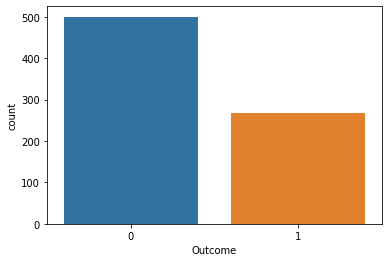

In [ ]:
sns.countplot(x='Outcome',data=df)

Data is unbalanced as the number of diabetic represented by 0 is 500 whereas non-diabetic number is 268

#Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


As shown by tabel above there are no missing Values. However there are values which are 0 in columns Glucose, BloodPressure,SkinThickness,Insulin,BMI which means data are missing so they are needed to be replaced by NaN

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
total_missing=df.isna().sum()
missing_percent=df.isnull().sum()/len(df)*100
missing_data = pd.concat([total_missing, missing_percent], axis=1, keys=['Total Missing', 'Missing Percentage'])
missing_data

,Total Missing,Missing Percentage
Pregnancies,0,0.000000
Glucose,5,0.651042
BloodPressure,35,4.557292
SkinThickness,227,29.557292
Insulin,374,48.697917
BMI,11,1.432292
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


The columns namely Glucose, BloodPressuree, SkinThickness, Insulin and BMI contains 5 (0.65%),35(4.55%), 227 (29.55%) and 374(48.69%) missing data respectively which can also be represented in heatmap as shown in figure below

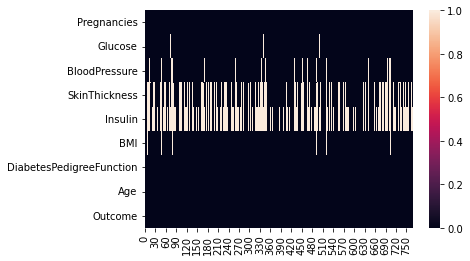

In [ ]:
sns.heatmap(df.isna().transpose())

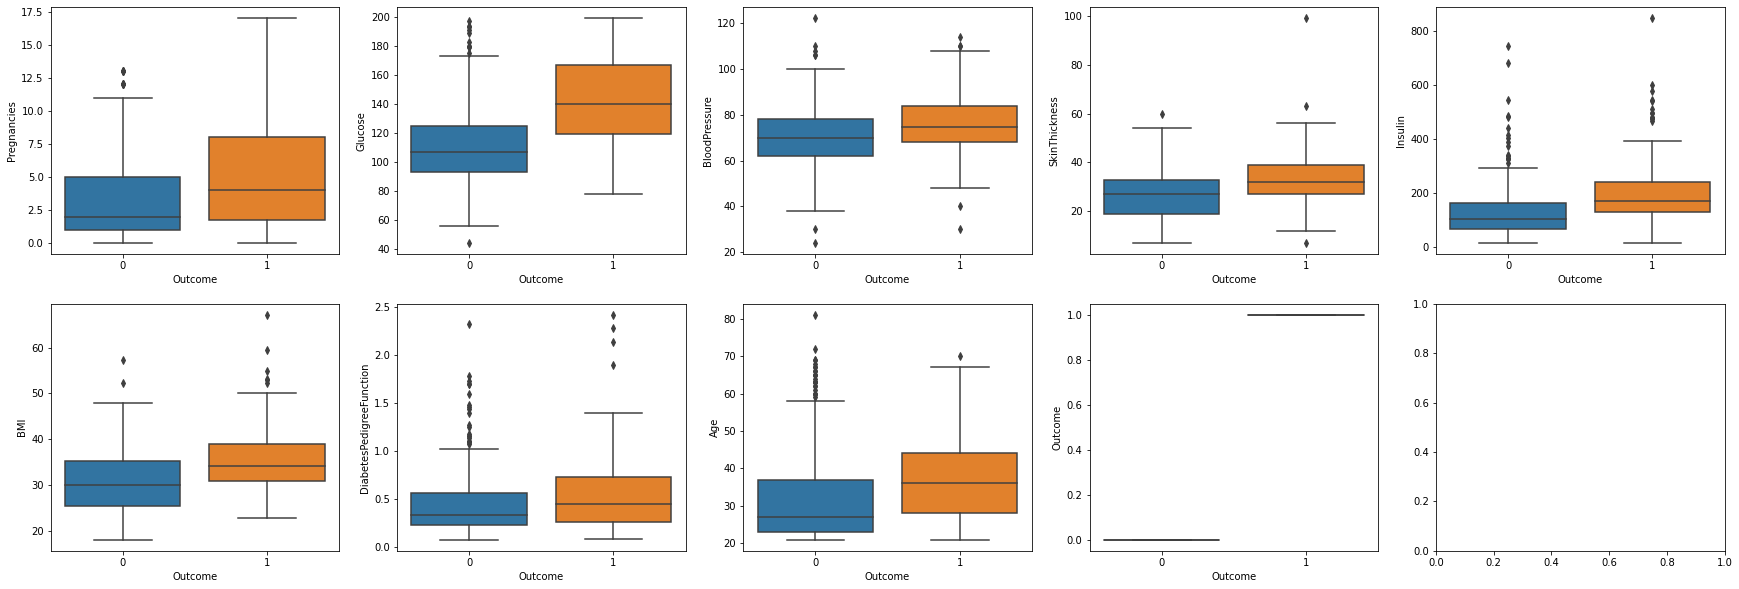

In [ ]:
fig, axes = plt.subplots(ncols = 5, nrows = 2, figsize = (30, 10))
index = 0
ax = axes.flatten()

for col, value in df.items():
    sns.boxplot(x='Outcome',y=col, data=df, ax=ax[index])
    index += 1

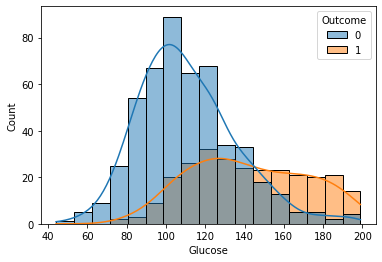

In [ ]:
sns.histplot(df, x='Glucose',hue='Outcome',kde=True)

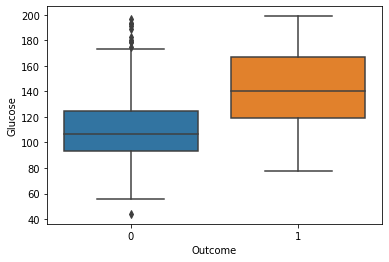

In [ ]:
sns.boxplot(x='Outcome',y='Glucose',data=df)

In [ ]:
df.groupby('Outcome').Glucose.median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [ ]:
def fill_missing(data):

  gul=data[0]
  out=data[1]

  if pd.isnull(gul):
    if np.outer==0:
      return 107.0
    else:
      return 104.0   
  return gul

In [ ]:
gul_imputed=df[['Glucose','Outcome']].apply(fill_missing, axis='columns')

In [ ]:
df.Glucose=gul_imputed

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

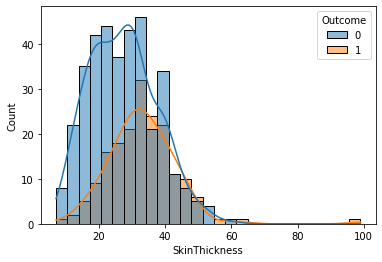

In [ ]:
sns.histplot(df, x='SkinThickness',hue='Outcome',kde=True)

In [ ]:
df.groupby('Outcome').SkinThickness.median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [ ]:
def fill_missing(data):

  skin=data[0]
  out=data[1]

  if pd.isnull(skin):
    if np.outer==0:
      return 27
    else:
      return 32   
  return skin

In [ ]:
skin_imputed=df[['SkinThickness','Outcome']].apply(fill_missing, axis='columns')
df.SkinThickness=skin_imputed

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

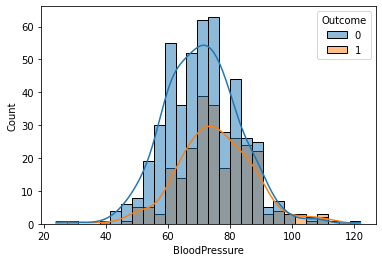

In [ ]:
sns.histplot(df, x='BloodPressure',hue='Outcome',kde=True)

In [ ]:
df.groupby('Outcome').BloodPressure.median()

Outcome
0    70.0
1    74.5
Name: BloodPressure, dtype: float64

In [ ]:
def fill_missing(data):

  blood=data[0]
  out=data[1]

  if pd.isnull(blood):
    if np.outer==0:
      return 70
    else:
      return 74.5   
  return blood

In [ ]:
blood_imputed=df[['BloodPressure','Outcome']].apply(fill_missing, axis='columns')
df.BloodPressure=blood_imputed

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

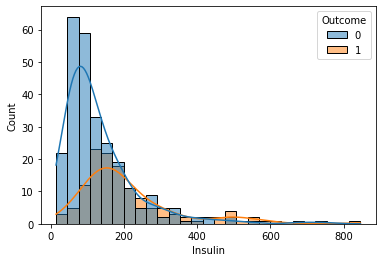

In [ ]:
sns.histplot(df, x='Insulin',hue='Outcome',kde=True)

In [ ]:
df.drop(columns=['Insulin'],inplace=True)

In [ ]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

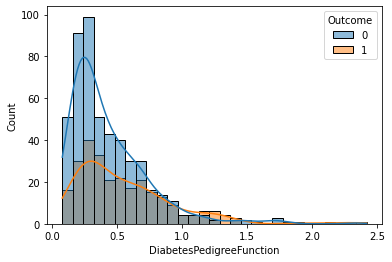

In [ ]:
sns.histplot(df, x='DiabetesPedigreeFunction',hue='Outcome',kde=True)

In [ ]:
df.groupby('Outcome').DiabetesPedigreeFunction.median()

Outcome
0    0.336
1    0.449
Name: DiabetesPedigreeFunction, dtype: float64

In [ ]:
def fill_missing(data):

  dia=data[0]
  out=data[1]

  if pd.isnull(dia):
    if np.outer==0:
      return 0.336
    else:
      return 0.449  
  return dia

In [ ]:
dia_imputed=df[['DiabetesPedigreeFunction','Outcome']].apply(fill_missing, axis='columns')
df.DiabetesPedigreeFunction=dia_imputed

In [ ]:
df.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

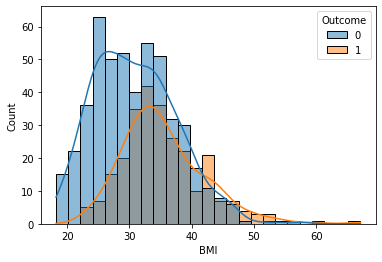

In [ ]:
sns.histplot(df, x='BMI',hue='Outcome',kde=True)

In [ ]:
df.groupby('Outcome').BMI.median()

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [ ]:
def fill_missing(data):

  bmi=data[0]
  out=data[1]

  if pd.isnull(bmi):
    if np.outer==0:
      return 30.1
    else:
      return 34.3  
  return bmi

In [ ]:
bmi_imputed=df[['BMI','Outcome']].apply(fill_missing, axis='columns')
df.BMI=bmi_imputed

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#Corelation between features

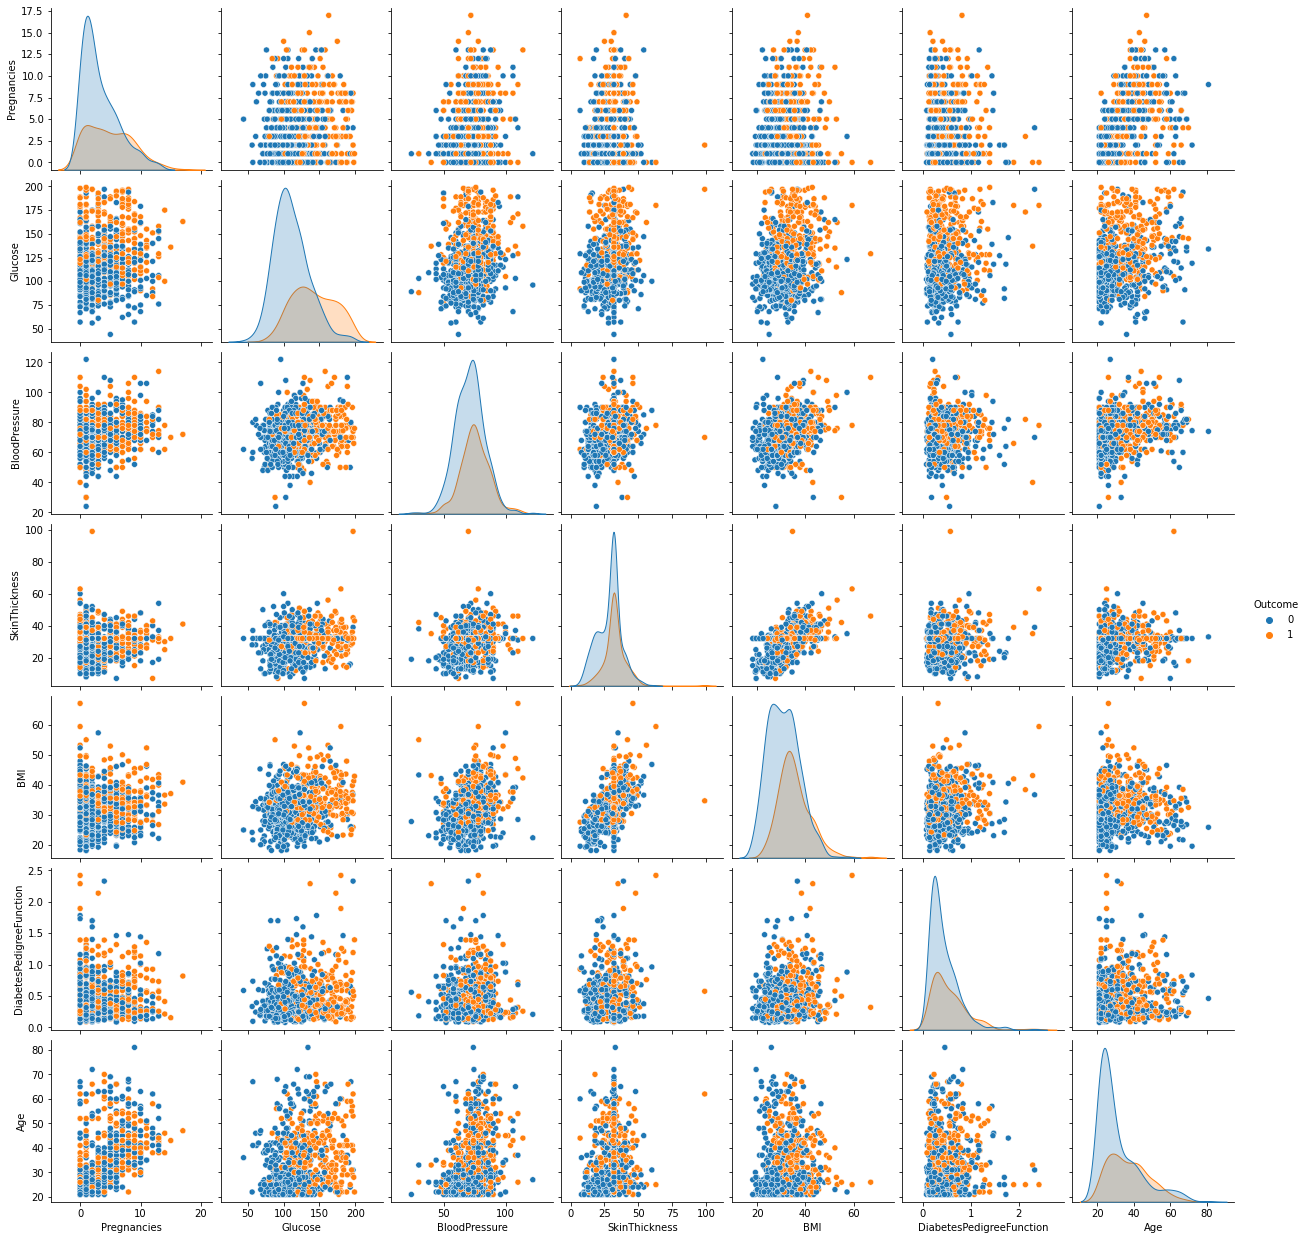

In [ ]:
sns.pairplot(df,hue='Outcome')

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128945,0.207879,0.104428,0.021627,-0.033523,0.544341,0.221898
Glucose,0.128945,1.000000,0.218511,0.196360,0.228159,0.137957,0.267736,0.491985
BloodPressure,0.207879,0.218511,1.000000,0.209662,0.281826,-0.004751,0.322686,0.167757
SkinThickness,0.104428,0.196360,0.209662,1.000000,0.522110,0.077395,0.158825,0.220678
BMI,0.021627,0.228159,0.281826,0.522110,1.000000,0.152875,0.024596,0.310420
DiabetesPedigreeFunction,-0.033523,0.137957,-0.004751,0.077395,0.152875,1.000000,0.033561,0.173844
Age,0.544341,0.267736,0.322686,0.158825,0.024596,0.033561,1.000000,0.238356
Outcome,0.221898,0.491985,0.167757,0.220678,0.310420,0.173844,0.238356,1.000000


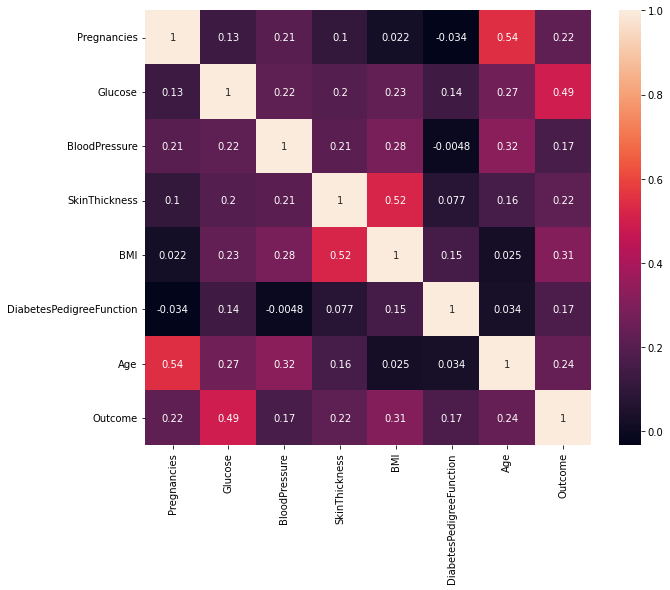

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True)

#StandardScaler 

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
x.shape, y.shape

((768, 7), (768,))

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x=scaler.fit_transform(x)

#Modeling logistic regression

##Selection of features

In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,
0,3.298000,110.604000,71.015000,28.560000,30.921600,0.429734,31.190000
1,4.865672,142.033582,75.272388,32.671642,35.398507,0.550500,37.067164


From above table we can draw following conclusions,

There is notable variation in mean values for almost all independt variables. 

Pregnancies is positvely skewed and diverts from diagonal line. Log  transforamtion has been perforemed

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=40)

In [ ]:
x_train.shape,y_train.shape

((514, 7), (514,))

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,classification_report

In [ ]:
lg=accuracy_score(y_test,y_pred)

In [ ]:
lgp=precision_score(y_test,y_pred)

In [ ]:
lgr=recall_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[139,  16],
       [ 46,  53]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       155
           1       0.77      0.54      0.63        99

    accuracy                           0.76       254
   macro avg       0.76      0.72      0.72       254
weighted avg       0.76      0.76      0.74       254



#Decision Tree Classifier

#Selection of features

### chi square test to select best feature for classification

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.feature_selection import chi2,SelectKBest

In [ ]:
best=SelectKBest(chi2,k=2)

In [ ]:
best.fit(x,y)

SelectKBest(k=2, score_func=<function chi2 at 0x7f7e81ab1550>)

In [ ]:
new_x=best.transform(x)

In [ ]:
new_x[0]

array([148.,  50.])

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,32.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


Chisquare and K best chosse Glucose and Age as best feature

In [ ]:
X=df[['Glucose','Age']]

In [ ]:
X.head()

,Glucose,Age
0,148.0,50
1,85.0,31
2,183.0,32
3,89.0,21
4,137.0,33


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77       155
           1       0.64      0.57      0.60        99

    accuracy                           0.70       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.70      0.70      0.70       254



###Hyperparameter tuning

In [ ]:
param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth':[2,6,9],
    'max_features':['sqrt','log2'],
    'random_state':[10,20,30,40]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
cv=GridSearchCV(model,param_grid=param_grid,cv=5)

In [ ]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 9],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [10, 20, 30, 40]})

In [ ]:
best_model=cv.best_estimator_

In [ ]:
y_pred=best_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       155
           1       0.74      0.58      0.65        99

    accuracy                           0.76       254
   macro avg       0.75      0.72      0.73       254
weighted avg       0.75      0.76      0.75       254



As we can see after hyper parameter tuning the values of prescion value, recall, f1-score, accuracy have been increased

In [ ]:
dt=accuracy_score(y_test,y_pred)

In [ ]:
dtp=precision_score(y_test,y_pred)

In [ ]:
dtr=recall_score(y_test,y_pred)

#Random Forest

In [ ]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       155
           1       0.69      0.58      0.63        99

    accuracy                           0.73       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.73      0.73      0.73       254



In [ ]:
rf=accuracy_score(y_test,y_pred)

In [ ]:
rfp=precision_score(y_test,y_pred)

In [ ]:
rfr=recall_score(y_test,y_pred)

,Model,Accuracy_score,Precision,Recall
0,Logistic Regression,0.755906,0.768116,0.535354
1,Decision Tree,0.755906,0.740260,0.575758
2,Random Forest,0.732283,0.686747,0.575758


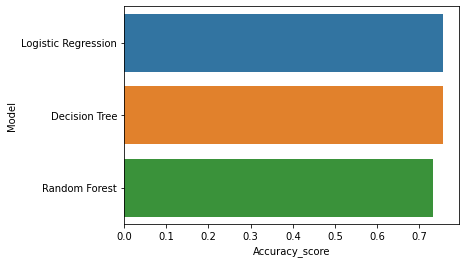

In [ ]:
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy_score' :[lg, dt, rf],
    'Precision' : [lgp, dtp, rfp],
    'Recall':[lgr, dtr, rfr]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)


models.sort_values(by='Accuracy_score', ascending=False)


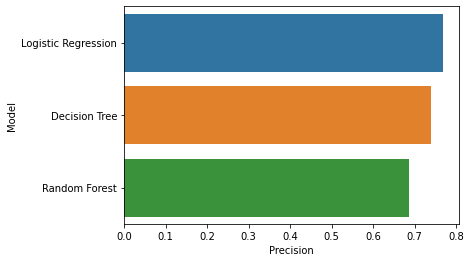

In [ ]:
sns.barplot(x='Precision', y='Model', data=models)


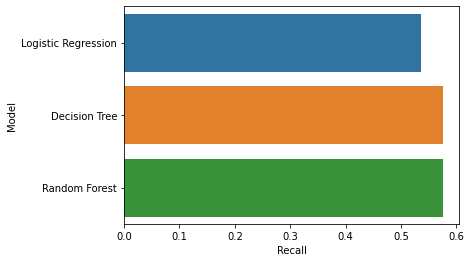

In [ ]:
sns.barplot(x='Recall', y='Model', data=models)